# Poverty Index in Mexico -  Forecast Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed
from sklearn.metrics import mean_absolute_error as mae

#Set random seeds
tf.random.set_seed(42)
seed(42)
random.seed(42)
set_random_seed(42)

2023-07-28 01:39:00.194410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-28 01:39:00.332297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-28 01:39:00.332342: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-28 01:39:00.352373: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-28 01:39:03.471532: W tensorflow/stream_executor/platform/de

## Data Import and Cleaning

In [3]:
df = pd.read_csv("Labor_Poverty.csv", index_col=0) #imported data
df = df.replace({"ND": None}) # Removed superfluous data
df = df.astype("float") # Changed data types
df = df.transpose() # Transpose the table
df['04-2020'] = (df['01-2020'] + df['07-2020'])/2 # #Interpolated missing value with simple average // TO-DO: Use the average all the 3 quarter for 2020 to interpolate.
# df.columns = pd.to_datetime(df.columns, format="%m-%Y") # WRONG: Cast column data type to datetime
df

,01-2005,04-2005,07-2005,11-2005,01-2006,04-2006,07-2006,11-2006,01-2007,04-2007,...,11-2020,01-2021,04-2021,07-2021,11-2021,01-2022,04-2022,07-2022,11-2022,01-2023
Aguascalientes,34.0,32.1,32.3,30.0,31.4,30.6,29.6,31.4,33.0,31.0,...,35.5,34.8,34.7,35.4,34.8,36.2,37.2,38.8,39.9,37.4
Baja California,14.4,13.8,15.1,13.4,14.3,13.6,13.5,15.8,14.7,12.8,...,25.9,26.7,21.6,23.0,22.4,17.8,19.5,21.1,19.8,18.7
Baja California Sur,18.4,17.9,17.4,15.8,15.7,13.6,13.8,12.3,14.3,14.2,...,26.1,28.2,23.8,19.6,15.6,17.2,15.8,15.6,15.8,15.6
Campeche,41.7,42.0,42.8,39.7,41.2,38.8,38.3,39.1,39.1,37.9,...,43.8,43.2,41.2,43.7,39.9,37.9,41.0,42.7,42.0,41.8
Coahuila de Zaragoza,29.6,29.1,27.7,26.5,26.6,25.4,25.3,25.7,25.9,24.3,...,28.6,28.0,27.3,27.8,26.9,27.3,26.1,24.8,23.2,27.2
Colima,24.0,23.5,22.6,23.6,22.9,19.4,21.2,22.3,23.5,21.1,...,30.5,30.5,25.2,24.6,23.8,24.7,24.2,25.8,27.2,24.9
Chiapas,69.6,69.2,68.0,69.5,67.8,68.4,67.3,68.7,69.4,63.6,...,68.1,68.1,65.3,68.5,69.3,65.3,66.8,69.6,68.8,67.2
Chihuahua,26.4,25.5,25.8,24.5,20.5,19.8,22.4,22.0,21.9,21.5,...,28.5,29.7,25.6,28.7,26.0,26.0,24.1,24.2,22.6,27.2
Ciudad de México,22.6,24.1,23.9,20.7,20.4,22.1,22.5,22.3,21.4,21.0,...,41.8,44.6,40.4,37.9,37.4,35.9,32.8,35.6,31.4,29.7
Durango,43.5,43.8,42.6,39.6,40.7,38.3,41.3,39.3,40.3,38.6,...,38.8,38.8,37.3,37.6,36.8,37.1,35.7,36.2,36.7,38.6


## Modeling

Do train/test split among the 32 states for baseline.  Model may not generalize if we get a sample of states that don't capture diversity of poverty among different...urban vs. rural etc.

## First try: leave last column for forecast comparision and forecast a year from and including last column, in other words forecast all of 2023.

In [4]:
# Just slice off more columns for longer forecast.
arr = np.expand_dims(df.to_numpy(), axis=2)
X = arr[:,0:-2,:] # All quarters except the last two
y = arr[:,-2,:]
y_lqrt = arr[:,-1,:] # Last quarter

In [5]:
X[:,-1,:];

In [6]:
y_lqrt;

In [10]:
X.shape[1:]

(71, 1)

In [11]:
# Spliting the Data, holding back last column to check forecast accuracy on column that model hasn't seen.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Split data into 80% train, 20% test

In [12]:
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten
from tensorflow.keras.callbacks import EarlyStopping

### Baseline Setup (SAVE this one for first API)

In [19]:
def compile_model(model):
    model.compile(loss='mae',
                  optimizer='adam', 
                  metrics=['mae'])
    return model

def fit_model(X,X_train,y_train):
    model = Sequential()
    model.add(SimpleRNN(input_shape=X.shape[1:], units=10, activation='tanh', return_sequences=False))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    # Compiling the RNN
    model = compile_model(model)
    
    #Baseline Training
    es = EarlyStopping(patience=15, restore_best_weights=True)
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        batch_size=8, 
                        epochs=1000, 
                        callbacks=[es],
                        verbose=1)
    return history, model

In [24]:
fit_model(X, X_train, y_train)

Epoch 1/1000
3/3 [==============================] - 1s 178ms/step - loss: 34.2154 - mae: 34.2154 - val_loss: 49.6599 - val_mae: 49.6599
Epoch 2/1000
3/3 [==============================] - 0s 31ms/step - loss: 34.1056 - mae: 34.1056 - val_loss: 49.5499 - val_mae: 49.5499
Epoch 3/1000
3/3 [==============================] - 0s 33ms/step - loss: 33.9956 - mae: 33.9956 - val_loss: 49.4398 - val_mae: 49.4398
Epoch 4/1000
3/3 [==============================] - 0s 26ms/step - loss: 33.8853 - mae: 33.8853 - val_loss: 49.3293 - val_mae: 49.3293
Epoch 5/1000
3/3 [==============================] - 0s 38ms/step - loss: 33.7748 - mae: 33.7748 - val_loss: 49.2186 - val_mae: 49.2186
Epoch 6/1000
3/3 [==============================] - 0s 49ms/step - loss: 33.6640 - mae: 33.6640 - val_loss: 49.1076 - val_mae: 49.1076
Epoch 7/1000
3/3 [==============================] - 0s 59ms/step - loss: 33.5529 - mae: 33.5529 - val_loss: 48.9962 - val_mae: 48.9962
Epoch 8/1000
3/3 [==============================] - 0s

In [22]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 36ms/step - loss: 2.1668 - mae: 2.1668


[2.1667752265930176, 2.1667752265930176]

Off by 2.17% MAE on the test set.

In [15]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 202ms/step


In [16]:
mae(y_pred,y_lqrt)

1.958244782686234

Prediction on last quarter has 1.958% MAE.  So our prediction for 01-2023 is off by this much.

In [17]:
X.shape

(32, 71, 1)

In [ ]:
#Forecast further out based on the beginning X.  This for beyond quarters for target.
# Returns a yearly forecast given the model and X.
# The forecast is for a year (4 quarters after the target,y)

def yearly_forecast(model,X):    
    pred = model.predict(X);
    forecast = pred
    # Complete a year's worth of forecast
    for i in range(3):
        # Drop first column of X, append previous prediction.
        X_temp = X[:,1:] 

        # Append previous prediction at the end of the X_temp
        X_temp = np.append(X_temp, pred[:, np.newaxis], axis=1)
        
        # Predict next quarter, using previous prediction
        pred = model.predict(X_temp);
        forecast = np.c_[forecast,pred]
    return forecast

yearly_forecast(model,X);


1/1 [==============================] - 0s 24ms/step


In [ ]:
columns = ['01-2023','04-2023','07-2023','11-2023']
df_forecast = pd.DataFrame(forecast,index = df.index, columns = columns)
df_forecast

,01-2023,04-2023,07-2023,11-2023
Aguascalientes,38.506355,38.300869,38.106251,37.921249
Baja California,20.121811,19.269632,18.246122,17.128788
Baja California Sur,16.022701,16.651569,17.497980,18.661345
Campeche,42.121655,41.589447,41.136578,40.750004
Coahuila de Zaragoza,23.046770,21.734194,19.983887,17.922386
Colima,25.355320,24.071947,22.291349,19.933537
Chiapas,54.727440,49.534340,46.075596,43.732906
Chihuahua,22.650461,21.481884,19.935076,18.098063
Ciudad de México,35.055691,34.767429,34.466652,34.151852
Durango,35.822590,35.501499,35.172050,34.832520


STOP here.

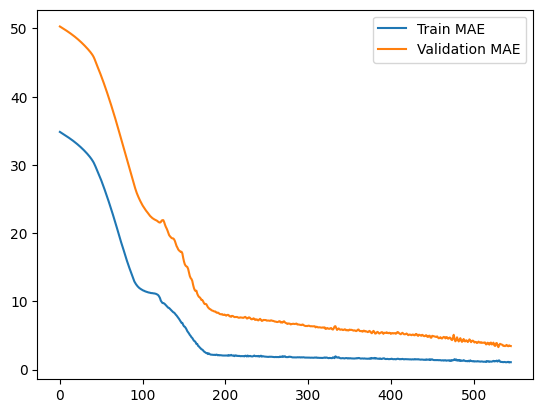

In [ ]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

## Second try: train the model on full data set, and get 1-year forecast into the future.

In [ ]:
arr_full = np.expand_dims(df.to_numpy(), axis=2)
X = arr_full[:,:-1,:]
y = arr_full[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Building the RNN architecture
model_full = Sequential()
model_full.add(SimpleRNN(input_shape=(72, 1), units=10, activation='tanh', return_sequences=False))
model_full.add(Dense(15, activation='relu'))
model_full.add(Dense(1, activation='linear'))

# Compiling the RNN
model_full = compile_model(model_full)

#Baseline Training
es = EarlyStopping(patience=15, restore_best_weights=True)
history = model_full.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=8, 
                    epochs=1000, 
                    callbacks=[es],
                    verbose=1)

Epoch 1/1000
3/3 [==============================] - 0s 63ms/step - loss: 30.0506 - mae: 30.0506 - val_loss: 45.4884 - val_mae: 45.4884
Epoch 2/1000
3/3 [==============================] - 0s 62ms/step - loss: 29.7724 - mae: 29.7724 - val_loss: 45.1655 - val_mae: 45.1655
Epoch 3/1000
3/3 [==============================] - 0s 90ms/step - loss: 29.4857 - mae: 29.4857 - val_loss: 44.8381 - val_mae: 44.8381
Epoch 4/1000
3/3 [==============================] - 0s 84ms/step - loss: 29.2006 - mae: 29.2006 - val_loss: 44.5361 - val_mae: 44.5361
Epoch 5/1000
3/3 [==============================] - 0s 83ms/step - loss: 28.9276 - mae: 28.9276 - val_loss: 44.2370 - val_mae: 44.2370
Epoch 6/1000
3/3 [==============================] - 0s 63ms/step - loss: 28.6458 - mae: 28.6458 - val_loss: 43.9446 - val_mae: 43.9446
Epoch 7/1000
3/3 [==============================] - 0s 64ms/step - loss: 28.3545 - mae: 28.3545 - val_loss: 43.6381 - val_mae: 43.6381
Epoch 8/1000
3/3 [==============================] - 0s 

# 

## 

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9681ab42-863e-4777-a44c-6086fcfadbac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>